<a href="https://colab.research.google.com/github/GTWFam/Group7_DS3010/blob/main/CaseStudy4_Business.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Case Study 4 :  Data Science Shark Tank:  Pitch Your Ideas

**Due Date: March 1, 2022, BEFORE the beginning of class at 2:00pm ET**

NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

<img src="https://techcrunch.com/wp-content/uploads/2018/10/shark-tank.jpg?w=730&crop=1" width="400px"> 

After the previous three case studies,  your team is now equipped with a powerful set of data science skills. In this project, your team is going to make use of these skills to come up with an idea of a new business/startup based upon data science technology. Your goal is to design a service/solution, develop a prototype/demo and prepare a pitch for your idea.
* Your team needs to decide which business problem is important for the market you are joining in (for example, social media market, housing market, search market, etc.).
* Then design a data science approach to improve one of the current services or design a new service on any data that you choose.
* The solution should include:
  1. The use of Twitter data
  1. The use of at least one other data set to combine with the Twitter data
  1. The use of cloud resources
  1. A 90 second elevator pitch
  1. The normal longer present with a demo of your product
* NOTE, as opposed to the first three case studies, case study 5 is much more open ended.  
  * Business is the focus
  * The precise balance of the various things we learned in class is up to you.

# Background about Elevator Pitch (90 seconds) and Shark Tank

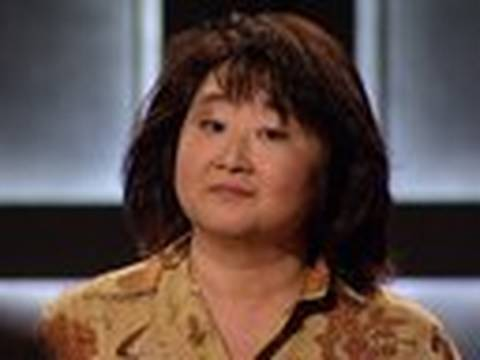

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("3UuFR4Y4uw8") 

### Two videos on storytelling

https://video.wpi.edu/Watch/g2T4NjBn

https://video.wpi.edu/Watch/q2A6Dbg3


**Optional Readings:** 
* LinkedIn API: https://developer.linkedin.com/docs/rest-api
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition


** Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

** Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/ 
* Statlib datasets: http://lib.stat.cmu.edu/
* Kaggel: www.kaggle.com 
* Open Gov. Data: www.data.gov, www.data.gov.uk, www.data.gov.fr, http://opengovernmentdata.org/data/catalogues/   

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.


### Problem 1 (20 points): the Business Part 
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on.
Pick one of the markets for further consideration, and design a new service  which you believe to be important in the market. 
Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe you could make a big difference with data science technology.
How are you planing to persuade the investors to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

1) Your business problem to solve:

  Designing a new product that will succeed with the customers.

2) Why the problem is important to solve? 

  This problem is important to enable competition in the markets and encourage development of not just "marginally" better products, but help companies design products that solve unmet needs of their customers and gain them larger market shares.

3) What is your idea to solve the problem? 

  We will utilize machine learning on product reviews to extract specific unmet needs that customers are facing and help small companies and new startups design their products around these and other crucial needs.

4) What differences you could make with your data science approach?

  Our data science approach simplifies and streamlines the usual consulting process. It is also incredibly robust and one model can be applied to any business problem. It is several magnitudes cheaper than hiring a consulting company. And finally, the result that our customer receives is empirically backed allowing them to proceed with confidence.

5) Why do you believe the idea deserves the investment of the "sharks"?

  Consulting is a complicated and expensive field. Despite this, almost every businesses has to employ consulting services or their own market research teams when developing and framing new products, to ensure that they fit their customer. This is a particular problem for small businesses and startups that often lack the funding necessary to hire these market analysts and frame their product in a way that can help them conquer the market.




### Problem 2 (20 points): The Data Part 

Define how Twitter data and at least one other dataset can be combined to make a Data Science product.

In [1]:
! pip install twitter
! pip install pymongo
! pip install dnspython

     |████████████████████████████████| 50 kB 5.9 MB/s 
     |████████████████████████████████| 266 kB 13.8 MB/s 


In [2]:
# your code here
import twitter
import pymongo
import json
import pprint
from google.colab import drive

drive.mount('/content/drive')
#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    # Prof. Paffenroth has a developer account for the class.  He will provide the Twitter access tokens for
    # each team
    # See https://developer.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    data = {}
    
    # Extracting the saved credentials from the drive
    with open('drive/MyDrive/ds3010_2022/credentials.txt', 'r') as f:
        data = json.load(f)
    CONSUMER_KEY = data["consumer_key"]
    CONSUMER_SECRET = data["consumer_secret"]
    OAUTH_TOKEN = data["oauth_token"]
    OAUTH_TOKEN_SECRET = data["oauth_token_secret"]
    mongodb_url = data["mongodb_url"]

    client = pymongo.MongoClient(mongodb_url)

    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api, client

twitter_api, client = oauth_login()
print(type(twitter_api))

Mounted at /content/drive
<class 'twitter.api.Twitter'>


In [3]:
db = client['DS3010']
twitter_coll_pos = db['CS4_twitter_pos']
twitter_coll_neg = db['CS4_twitter_neg']
kaggle_one = db["CS4_kaggle_one"]

In [ ]:
query = "disneyland :)"

data = twitter_api.search.tweets(q=query, lang='en', count=100)

min_id = data['statuses'][-1]['id']
for i in range(10):
    tweets = twitter_api.search.tweets(q=query, lang='en', max_id=min_id, count=100)
    min_id = tweets['statuses'][-1]['id']
    data['statuses'] += tweets['statuses']
print(len(data['statuses']))
print(type(data['statuses']))

104
<class 'list'>


Using MongoDB services to aggregate new twitter data that comes in every two weeks

In [ ]:
statuses = data['statuses']
# twitter_coll_pos.drop()
_ = twitter_coll_pos.insert_many(statuses)

In [ ]:
query = "disneyland :("

data = twitter_api.search.tweets(q=query, lang='en', count=100)

min_id = data['statuses'][-1]['id']
for i in range(10):
    tweets = twitter_api.search.tweets(q=query, lang='en', max_id=min_id, count=100)
    min_id = tweets['statuses'][-1]['id']
    data['statuses'] += tweets['statuses']
print(len(data['statuses']))
print()

55



In [ ]:
statuses = data['statuses']
# twitter_coll_neg.drop()
_ = twitter_coll_neg.insert_many(statuses)

In [ ]:
import pandas as pd
import csv

data = {}

with open('drive/MyDrive/ds3010_2022/DisneylandReviews.csv', encoding='utf-8',  errors='replace') as csvf:
    csvReader = csv.DictReader(csvf)
        
    for rows in csvReader:
        key = rows[list(rows.keys())[0]]
        data[key] = rows
with open('drive/MyDrive/ds3010_2022/kaggle_json.txt', 'w', encoding='utf-8',  errors='replace') as jsonf:
    jsonf.write(json.dumps(data, indent=4))

data = {}
    
with open('drive/MyDrive/ds3010_2022/kaggle_json.txt', 'r') as f:
    data = json.load(f)
print(data[list(data.keys())[2]])


{'Review_ID': '670623270', 'Rating': '4', 'Year_Month': '2019-4', 'Reviewer_Location': 'United Arab Emirates', 'Review_Text': 'Thanks God it wasn   t too hot or too humid when I was visiting the park   otherwise it would be a big issue (there is not a lot of shade).I have arrived around 10:30am and left at 6pm. Unfortunately I didn   t last until evening parade, but 8.5 hours was too much for me.There is plenty to do and everyone will find something interesting for themselves to enjoy.It wasn   t extremely busy and the longest time I had to queue for certain attractions was 45 minutes (which is really not that bad).Although I had an amazing time, I felt a bit underwhelmed with choice of rides and attractions. The park itself is quite small (I was really expecting something grand   even the main castle which was closed by the way was quite small).The food options are good, few coffee shops (including Starbucks) and plenty of gift shops. There was no issue with toilets as they are everyw

In [ ]:
i = 0
data_list = []
for review in data:
    data_list.append(data[review])

In [ ]:
kaggle_one.drop()
_ = kaggle_one.insert_many(data_list)

### Problem 3 (20 points): The Demo Part  


Implement a small Demo/Prototype/experiment result figures for the "product" of your data science company. You could use this demo during the Pitch

In [4]:
# your code here
twitter_pos = twitter_coll_pos.find()
twitter_neg = twitter_coll_neg.find()

In [5]:
twitter_pos_text = []
for tweet in twitter_pos:
    twitter_pos_text.append(tweet['text'])
print(twitter_pos_text[0])

twitter_neg_text = []
for tweet in twitter_neg:
    twitter_neg_text.append(tweet['text'])
print(twitter_neg_text[0])

RT @lau_ren_s: I took so much time in the Alice in Wonderland area at Disneyland and my normie friends were like, "wow u rly like alice huh…
I want to go to Disneyland. I haven’t been there since I was 10 years old :(


In [6]:
import re
exclude = ['am', 'me', 'im', 'was', 'ive', 'ur', 'which', 'so', 'as', 'i', 'rt', 'in', 'the', 'for','of', 'to', 'and', 'a', 'is', 'are', 'on', 'from', 'that', 'this', 'these', 'with', 'what', 'it', 'if', 'or', 'but', 'your', 'be', 'you', 'my', 'at', 'its']

tweet_texts = [ re.sub(r"[^\w\s'#@]", '', text) for text in twitter_pos_text ]
print(tweet_texts[0])
words = [ w for t in tweet_texts for w in t.lower().split() ]
words = list(filter(lambda x: x not in exclude, words))

from prettytable import PrettyTable
from collections import Counter

c = Counter(words)

pt = PrettyTable(field_names=['Word', 'Count'])
[ pt.add_row(kv) for kv in c.most_common()[:30] ]
pt.align['Word'], pt.align['Count'] = 'l', 'r'
print(pt)

RT @lau_ren_s I took so much time in the Alice in Wonderland area at Disneyland and my normie friends were like wow u rly like alice huh
+-------------+-------+
| Word        | Count |
+-------------+-------+
| disneyland  |    75 |
| time        |    16 |
| d           |    13 |
| @disneyland |    13 |
| go          |    12 |
| somehow     |    12 |
| both        |    12 |
| like        |    11 |
| @_embo      |    11 |
| read        |    11 |
| cup         |    11 |
| parts       |    11 |
| sounded     |    11 |
| worrisome   |    11 |
| deserved    |    11 |
| same        |    11 |
| just        |     9 |
| have        |     9 |
| one         |     8 |
| going       |     8 |
| no          |     8 |
| disney      |     7 |
| we          |     7 |
| there       |     7 |
| #disneyland |     6 |
| had         |     6 |
| been        |     6 |
| much        |     5 |
| friends     |     5 |
| can         |     5 |
+-------------+-------+


In [7]:
twitter_pos_text_reduced = []
for text in twitter_pos_text:
    reduced = filter(lambda w: w not in exclude, re.split(r'\W+', text.lower()))
    txt = ' '.join(list(reduced))
    twitter_pos_text_reduced.append(txt)
print(twitter_pos_text_reduced)

['lau_ren_s took much time alice wonderland area disneyland normie friends were like wow u rly like alice huh ', 'send money can go disneyland thank', 'took much time alice wonderland area disneyland normie friends were like wow u rly like https t co 4fvo83q5mf', ' ruincrab hobbesq heck yeah old disney few years back we were disneyland roger rabbit ride closed th https t co urnvpywqld', 'disneyland world summer ', ' nathanbarry dang we try go each year even s just one night enjoyed 4 day trip disneyland last weekend ', 'went disneyland job fair whim got job happy friday everyone d', 'did know disneyland isn t only place southern california get blue bantha milk princesscruises calls https t co zrbjuwwt0s', 'looking visit disneyland pregnant come find out best tips keep happiest gestational place e https t co qw8chsggb5', ' ed92magic never had dinner there stay there almost everytime when go disneyland ok few nights', ' rudypineda24 realtor_ranferi some great places celebrate birthday di

In [8]:
tweet_texts = [ re.sub(r"[^\w\s'#@]", '', text) for text in twitter_neg_text ]
print(tweet_texts[0])
words = [ w for t in tweet_texts for w in t.lower().split() ]
words = list(filter(lambda x: x not in exclude, words))

c = Counter(words)

pt = PrettyTable(field_names=['Word', 'Count'])
[ pt.add_row(kv) for kv in c.most_common()[:30] ]
pt.align['Word'], pt.align['Count'] = 'l', 'r'
print(pt)

I want to go to Disneyland I havent been there since I was 10 years old 
+-------------+-------+
| Word        | Count |
+-------------+-------+
| disneyland  |    53 |
| go          |    25 |
| going       |    14 |
| miss        |    13 |
| wanna       |    11 |
| gm          |    11 |
| gt          |     6 |
| want        |     5 |
| take        |     5 |
| not         |     4 |
| never       |     4 |
| friends     |     4 |
| been        |     3 |
| there       |     3 |
| bad         |     3 |
| them        |     3 |
| someone     |     3 |
| @disneyland |     3 |
| wanted      |     3 |
| can         |     3 |
| wish        |     3 |
| currently   |     3 |
| old         |     2 |
| date        |     2 |
| here        |     2 |
| we          |     2 |
| one         |     2 |
| still       |     2 |
| they        |     2 |
| dont        |     2 |
+-------------+-------+


In [9]:
twitter_neg_text_reduced = []
for text in twitter_neg_text:
    reduced = filter(lambda w: w not in exclude, re.split(r'\W+', text.lower()))
    txt = ' '.join(list(reduced))
    twitter_neg_text_reduced.append(txt)
print(twitter_neg_text_reduced)

['want go disneyland haven t been there since 10 years old ', 'met girl taimi louisiana she s literally sweetest wtf she says she d take date https t co vaovf8pqjg', 'half people snap either bad bunny concert living their best life disneyland here https t co pborhm0rzh', 'y all remember those busses we would take band go disneyland hs yeah m one except m not going disneyland ', 'disneyland still miss bf ', ' timjdillon disneyland anaheim brea where dinosaurs all went die ', 'wanna go disneyland ve never been https t co wgqd2hkosq', 'kinda want go disneyland ', ' jillie_bee they don t m not sure mechanisms them still there they don t do them anymore https t co v3jyxgdlr5', 'someone take disneyland ve never been ', 'paobabyyyy ve always wanted take pic w eeyore disneyland can never find him ', 've always wanted take pic w eeyore disneyland can never find him ', 'wanna go disneyland ', 'every one boo taking them disneyland wish had boo', 'wish disneyland ', ' convomf might sounds childish

In [10]:
kaggle = kaggle_one.find()
pos_reviews = []
neg_reviews = []
# Selecting only Disneyland from California
for review in kaggle:
    if review['Branch'] == "Disneyland_California":
        if int(review['Rating']) > 3:
            pos_reviews.append(review['Review_Text'])
        else:
            neg_reviews.append(review['Review_Text'])

print(pos_reviews[0])
print(neg_reviews[0])

This place has always been and forever will be special. The feeling you get entering the park, seeing the characters and different attractions is just priceless. This is definitely a dream trip for all ages, especially young kids. Spend the money and go to Disneyland, you will NOT regret it
Took my son to the Park on a weekend(Fri Sun). Very busy all over the places. My son enjoyed it, but he was very sad that he could not try a lot of attractions as the wait time was huge.....( ranging from 60 90 minutes) If you have a lot of time to waste waiting in the line for the attractions, FASTPASS system at the park is just a ripoff. You can have only one attraction added to your plan at any point, once you complete that attraction you can add one more. 


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

all_pos = twitter_pos_text + pos_reviews
all_neg = twitter_neg_text + neg_reviews

vectorizer = TfidfVectorizer(min_df=1, max_df=0.7, ngram_range=(1,2))
pos_vector = vectorizer.fit_transform(all_pos)
unique_words_pos = vectorizer.get_feature_names_out()
neg_vector = vectorizer.fit_transform(all_neg)
unique_words_neg = vectorizer.get_feature_names_out()

In [12]:
from sklearn.feature_selection import SelectKBest, chi2

y_pos = [1] * 16602
y_neg = [0] * 2963

best_selector = SelectKBest(chi2, k=10)
best_pos = best_selector.fit_transform(pos_vector, y_pos)
print(best_selector.get_feature_names_out())
best_neg = best_selector.fit_transform(neg_vector, y_neg)
print(best_selector.get_feature_names_out())

['x350210' 'x350211' 'x350212' 'x350213' 'x350214' 'x350215' 'x350216'
 'x350217' 'x350218' 'x350219']
['x153947' 'x153948' 'x153949' 'x153950' 'x153951' 'x153952' 'x153953'
 'x153954' 'x153955' 'x153956']


In [13]:
for i in range(350210, 350220):
    print(unique_words_pos[i], end=', ')
print()
for i in range(153947, 153957):
    print(unique_words_neg[i], end=', ')

zoom on, zoom past, zorg, zorg with, zrbjuwwt0s, zurg, zurg and, zurg so, zurg times, zurg we, 
zoo or, zoo the, zoo then, zoo this, zoo times, zoo universal, zoo we, zoo while, zoo worth, zoo would, 

In [14]:
! mkdir data
! mkdir ./data/pos
for index, txt in enumerate(all_pos):
    with open('./data/pos/file_' + str(index) + '.txt', 'x') as f:
        f.write(txt)

In [15]:
! mkdir ./data/neg
for index, txt in enumerate(all_neg):
    with open('./data/neg/file_' + str(index) + '.txt', 'x') as f:
        f.write(txt)

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [16]:
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

dataset = load_files('./data', shuffle=False)
print("n_samples: %d" % len(dataset.data))

n_samples: 19565


In [17]:
docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

In [18]:
data_vect = TfidfVectorizer(min_df=1, max_df=0.7, ngram_range=(1,2))

train_vector = data_vect.fit_transform(docs_train)
unique_words_train = data_vect.get_feature_names_out()
test_vector = data_vect.transform(docs_test)
unique_words_test = data_vect.get_feature_names_out()

best_select = SelectKBest(chi2, k=100)
best_train = best_select.fit_transform(train_vector, y_train)
best_indexes_train = best_select.get_feature_names_out()

best_test = best_select.fit_transform(test_vector, y_test)
best_indexes_test = best_select.get_feature_names_out()

In [19]:
for i in best_indexes_train:
    index = int(i.split('x')[1])
    print(unique_words_train[index], end=', ')
print()
for i in best_indexes_test:
    index = int(i.split('x')[1])
    print(unique_words_test[index], end=', ')

amazing, amount, an hour, anymore, awful, be told, breaking, broke, broke down, broken, broken down, broken rides, closed, control, dirty, disappointed, disappointed with, disappointing, disappointment, disneyland gt, dollars, down, employees, even walk, full price, gm, gm miss, great, great time, greed, gt, horrible, hour, hours, in line, joke, line, line to, love, loved, many people, minutes, miss going, money, money and, much money, never go, no, no longer, not, not worth, of money, of people, only to, over, over crowded, over priced, overcrowded, overpriced, paid, pay, paying, people, people in, poor, refund, ridiculous, rip, rip off, rude, should, shoulder, shut, so crowded, so disappointed, sorry, terrible, that, the amount, the worst, they, they need, they should, told, too many, universal, very disappointed, very disappointing, wanna, wanna go, waste, waste of, way too, we paid, were, were closed, were told, worse, worst, your money, 
400, 600, an hour, and terrible, anymore, a

In [20]:
chi2_scores, pvalues = chi2(train_vector, y_train)
indexes = []
for i in range(len(chi2_scores)):
    if pvalues[i] < 0.01:
        indexes.append((i, pvalues[i]))
        # print('%-20s %-20s %s' %(i, chi2_scores[i], pvalues[i]))

In [21]:
print(len(indexes))
best_predictors = []
for i in indexes:
    best_predictors.append(unique_words_train[i[0]])
    print('%-20s %s' %(unique_words_train[i[0]], i[1]))

99
amazing              0.003102720233079852
amount               0.008560525928057401
an hour              0.004049610449667299
anymore              0.009787966626673491
awful                0.004738351650892611
be told              0.004629143755994002
breaking             0.004692577342785369
broke                1.147276125793675e-05
broke down           5.488678725511462e-05
broken               3.4382930950532595e-05
broken down          0.0035279608892689316
broken rides         0.00756406527200122
closed               8.534663495585357e-06
control              0.0020407145999322912
dirty                0.0008070541963875319
disappointed         8.752889285655412e-05
disappointed with    0.007989034992570681
disappointing        3.146984337542464e-05
disappointment       0.0035423468314745017
disneyland gt        0.0037478565202201126
dollars              0.0050354626377031265
down                 0.0002167775761071695
employees            0.009633064262054554
even walk         

In [35]:
data_vect = TfidfVectorizer(min_df=1, max_df=1.0, ngram_range=(1,3), vocabulary=best_predictors)
best_train_vector = data_vect.fit_transform(docs_train)
best_test_vector = data_vect.transform(docs_test)

              precision    recall  f1-score   support

         neg       0.70      0.30      0.42       748
         pos       0.89      0.98      0.93      4144

    accuracy                           0.87      4892
   macro avg       0.79      0.64      0.67      4892
weighted avg       0.86      0.87      0.85      4892

0.8732624693376942


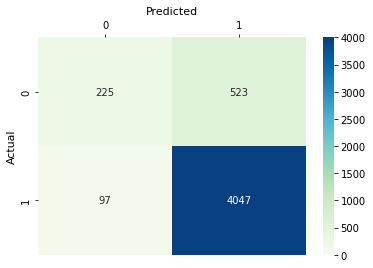

In [36]:
from sklearn.svm import LinearSVC
from sklearn import metrics
import seaborn as sns

svc_clf = LinearSVC(C=1, max_iter=5000)

model = svc_clf.fit(best_train_vector, y_train)
y_predicted = model.predict(best_test_vector)

print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
x = sns.heatmap(cm, vmin=0, vmax=4000, annot=True, fmt="d", linewidths=0, cmap="GnBu")
x.xaxis.tick_top()
x.set_title('Predicted', size=11)
x.set_ylabel('Actual', size=11)

print(model.score(best_test_vector, y_test))

              precision    recall  f1-score   support

         neg       0.71      0.36      0.48       748
         pos       0.89      0.97      0.93      4144

    accuracy                           0.88      4892
   macro avg       0.80      0.67      0.71      4892
weighted avg       0.87      0.88      0.86      4892

0.8800081766148814


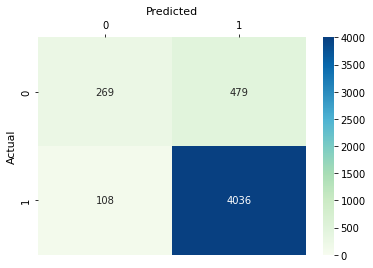

In [37]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=1, max_iter=500, hidden_layer_sizes=(10, 10, 10), activation='tanh')

model = mlp_clf.fit(best_train_vector, y_train)
y_predicted = model.predict(best_test_vector)

print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
x = sns.heatmap(cm, vmin=0, vmax=4000, annot=True, fmt="d", linewidths=0, cmap="GnBu")
x.xaxis.tick_top()
x.set_title('Predicted', size=11)
x.set_ylabel('Actual', size=11)

print(model.score(best_test_vector, y_test))

### Problem 4 (20 points): Prepare a 90 second Pitch and *present* it in the class 

* Prepare the slide(s) for the Pitch (10 points)
* Present it in the class (10 points).

**Advice:  It should really only be one or two slides, but a really good one or two slides!  Also, it is ok to select one person on the team to give the 90 second pitch (though a very organized multi-person 90 second pitch can be very impressive!)**



# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)


# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: **NOTE, for this Case Study you need to prepare two (2) PPT files!**  One for the 90 second Pitch and one for a normal 15 minute presentation.

*Please compress all the files into a single zipped file.*


** How to submit: **

        Please submit through canvas.wpi.edu.

### DS3010 Case Study 4 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **

# Grading Criteria:

**Totoal Points: 100**


---------------------------------------------------------------------------
**Notebook results:**
    Points: 80


    -----------------------------------
    Question 1:
    Points: 20
    -----------------------------------
    
    -----------------------------------
    Question 2:
    Points: 20
    -----------------------------------
        
    -----------------------------------
    Question 3:
    Points: 20
    -----------------------------------
  
    -----------------------------------
    Question 4:  90 second product pitch
    Points: 20
    -----------------------------------
      
    -----------------------------------

---------------------------------------------------------------------------
**Slides (for 15 minutes of presentation): Story-telling**
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 
